In [24]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pywt
import mahotas

In [4]:
#Joining all the paths
PATH = 'D:/Projects/FINAL_Pruned_Dataset/FINAL_Pruned_Dataset'
CATEGORIES=['MSIMUT','MSS']

train_dir = os.path.join(PATH, 'train')
#val_dir = os.path.join(PATH, 'val')
#test_dir = os.path.join(PATH, 'test')

train_msimut_dir = os.path.join(train_dir, 'MSIMUT')
train_mss_dir = os.path.join(train_dir, 'MSS')
#val_msimut_dir = os.path.join(val_dir, 'MSIMUT')
#val_mss_dir = os.path.join(val_dir, 'MSS')
#test_msimut_dir = os.path.join(test_dir, 'MSIMUT')
#test_mss_dir = os.path.join(test_dir, 'MSS')

In [5]:
# To Check how many images are in each directory
num_msimut_train, num_mss_train = len(os.listdir(train_msimut_dir)), len(os.listdir(train_mss_dir))

#num_msimut_val, num_mss_val = len(os.listdir(val_msimut_dir)), len(os.listdir(val_mss_dir))

#num_msimut_test, num_mss_test = len(os.listdir(test_msimut_dir)), len(os.listdir(test_mss_dir))

total_train = num_msimut_train + num_mss_train
#total_val = num_msimut_val + num_mss_val
#total_test = num_msimut_test + num_mss_test

print('Total training MSIMUT images: ', num_msimut_train)
print('Total training MSS images: ', num_mss_train)
#print('Total validation MSIMUT images: ', num_msimut_val)
#print('Total validation MSS images: ', num_mss_val)
#print('Total testing MSIMUT images: ', num_msimut_test)
#print('Total testing MSS images: ', num_mss_test)
print('---------------------------------')
print('Total training images: ', total_train)
#print('Total validation images: ', total_val)
#print('Total testing images: ', total_test)

Total training MSIMUT images:  4000
Total training MSS images:  4000
---------------------------------
Total training images:  8000


In [6]:
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature
def fd_haralick(image):    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    return haralick

In [7]:
IMG_SIZE=224

In [8]:
image_array = []

for categories in CATEGORIES:
    path=os.path.join(train_dir,categories)
    label=CATEGORIES.index(categories)
    
    for img in os.listdir(path):
        image = cv2.imread(os.path.join(path,img) ,1)  # convert to array
        global_features = np.hstack((fd_hu_moments(image),fd_haralick(image)))
        image_array.append([global_features, label])

In [9]:
import random
random.shuffle(image_array)

In [10]:
X = []
y = []

for features,label in image_array:
    X.append(features)
    y.append(label)

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state = 4)

In [13]:
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf'], 
             }
              
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.504, total=   2.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.504, total=   2.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.504, total=   2.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.504, total=   2.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.503, total=   2.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.504, total=   2.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.504, total=   2.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.504, total=   2.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.504, total=   2.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.590, total=   2.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.572, total=   2.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.600, total=   2.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.590, total=   2.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.594, total=   2.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.600, total=   2.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.636, total=   2.8s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  2.9min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [14]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

#Print Best score
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1, gamma=0.0001)
0.69796875


In [15]:
grid_predictions = grid.predict(xtest) 
from sklearn.metrics import classification_report
# print classification report 
print(classification_report(ytest, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       776
           1       0.69      0.71      0.70       824

    accuracy                           0.68      1600
   macro avg       0.68      0.68      0.68      1600
weighted avg       0.68      0.68      0.68      1600



In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state = 2)

In [16]:
from sklearn.svm import SVC
svclassifier = SVC(kernel = 'rbf', gamma=0.0001,C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3,max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svclassifier.fit(xtrain, ytrain)

SVC(gamma=0.0001)

In [17]:
y_pred = svclassifier.predict(xtest)

In [18]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.68375


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,y_pred)

array([[513, 263],
       [243, 581]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       776
           1       0.69      0.71      0.70       824

    accuracy                           0.68      1600
   macro avg       0.68      0.68      0.68      1600
weighted avg       0.68      0.68      0.68      1600



In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier, X, y, cv=15)

In [23]:
scores.mean()

0.6914977291518809

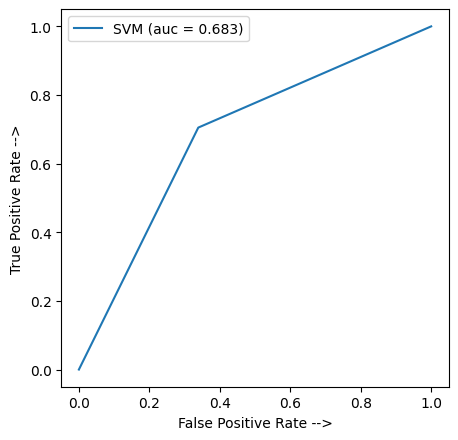

In [26]:
from sklearn.metrics import roc_curve, auc

svm_fpr, svm_tpr, threshold = roc_curve(ytest,y_pred)
auc_svm = auc(svm_fpr,svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()